In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))
results_df = pd.read_csv(zf.open('results.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))

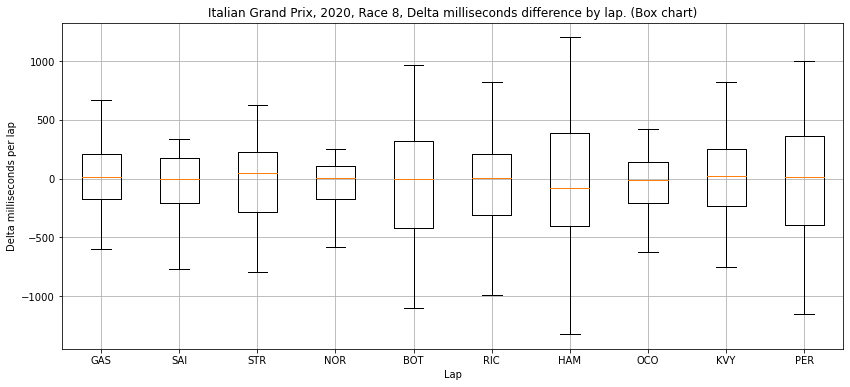

In [2]:
raceId = lap_times_df["raceId"].drop_duplicates().iloc[-1]
race_df = lap_times_df[lap_times_df["raceId"] == raceId]
result_df = results_df[results_df["raceId"] == raceId]
plt.figure(figsize=(14, 6))

for count, driverId in enumerate(result_df["driverId"].iloc[:10]):
    race_df_driver = race_df[race_df["driverId"] == driverId].copy()
    race_df_driver["delta_milliseconds"] = race_df_driver["milliseconds"] - race_df_driver["milliseconds"].shift()
    race_df_driver["delta_milliseconds"] = race_df_driver["delta_milliseconds"].fillna(0)
    plt.boxplot(race_df_driver["delta_milliseconds"],
                positions=[count + 1],
                widths=0.5,
                showfliers=False,
                labels=[drivers_df[drivers_df["driverId"] == driverId]["code"].iloc[-1]])

race_name = races_df[races_df["raceId"] == raceId]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == raceId]["year"].iloc[0]
race_round = races_df[races_df["raceId"] == raceId]["round"].iloc[0]

plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round) + ', Delta milliseconds difference by lap. (Box chart)')
plt.ylabel('Delta milliseconds per lap')
plt.xlabel('Lap')
plt.grid()
plt.show()

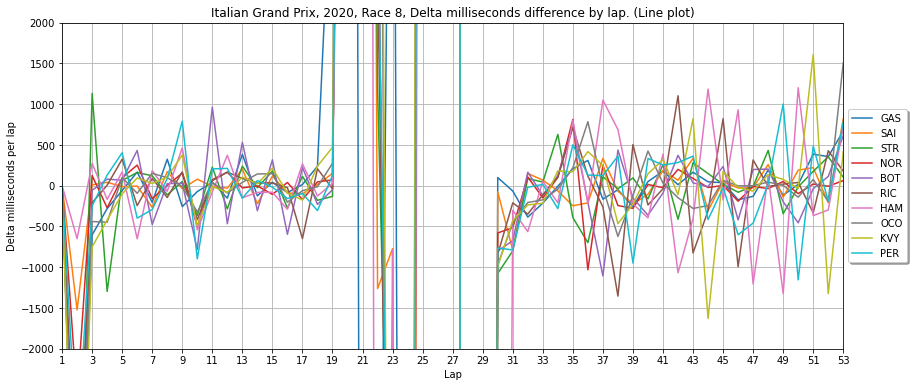

In [3]:
plt.figure(figsize=(14, 6))

for count, driverId in enumerate(result_df.driverId.iloc[:10]):
    race_df_driver = race_df[race_df.driverId == driverId].copy()
    race_df_driver["delta_milliseconds"] = race_df_driver.milliseconds - race_df_driver.milliseconds.shift()
    race_df_driver["delta_milliseconds"] = race_df_driver["delta_milliseconds"].fillna(0)
    plt.plot(race_df_driver["lap"],
             race_df_driver["delta_milliseconds"],
             label=drivers_df[drivers_df.driverId == driverId].code.iloc[-1])

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.ylim(-2000, 2000)
plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round) + ', Delta milliseconds difference by lap. (Line plot)')
plt.xlabel('Lap')
plt.ylabel('Delta milliseconds per lap')
plt.legend(loc='center left', fancybox=True, shadow=True, bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()